829it [00:03, 222.44it/s]


t: 0.4126044047445055, p: 0.6592349553038587


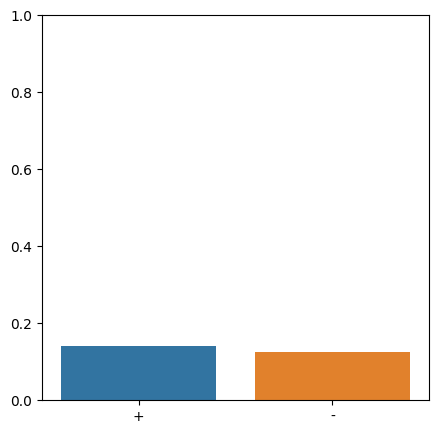

In [2]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=True)

100%|██████████| 29/29 [01:33<00:00,  3.21s/it]

t: -0.7120452040057363, p: 0.23969642885969655


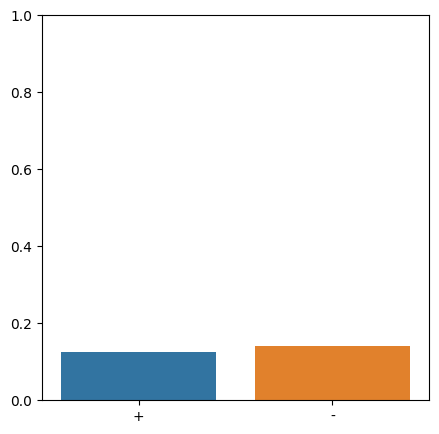

In [3]:
from lib.figure_6 import figure_6_poster_panel_d

figure_6_poster_panel_d(reset=False, mono=False)

590it [00:09, 64.33it/s]


[array([25.16657962, 24.68346387, 24.64471841, 24.87036444, 25.22767479,
       25.07741394, 25.53613299, 26.27738754, 26.53690082, 26.84238102,
       27.51616559, 27.9742621 , 28.3898826 , 28.77683456, 29.24671036,
       29.40413646, 29.67016363, 29.91547525, 30.28894115, 30.33484865,
       30.09325078, 30.04583507, 30.75681069, 31.10707053, 30.94751348,
       30.52846528, 30.65640404, 31.05413123, 31.51168991, 31.69094962,
       31.82212913, 32.99862198, 33.67666326, 33.7912635 , 34.09242653,
       34.48950429, 34.34430052, 34.6244743 , 35.13799482, 35.50976323,
       35.8476787 , 36.34489921, 36.1348616 , 36.34281862, 36.07674446,
       35.58527233, 35.80181205, 36.18174201, 36.45185562, 36.85026533,
       36.97677059, 37.12805722, 37.07167025, 36.76611256, 36.47366268,
       36.75709202, 37.17052858, 36.98328291, 37.74901926, 37.85131934,
       37.86414803, 38.02097606, 37.97779362, 37.7896941 , 38.15731259,
       38.15568602, 38.03024297, 38.13587675, 38.2509021 , 37.5

ValueError: All arrays must be of the same length

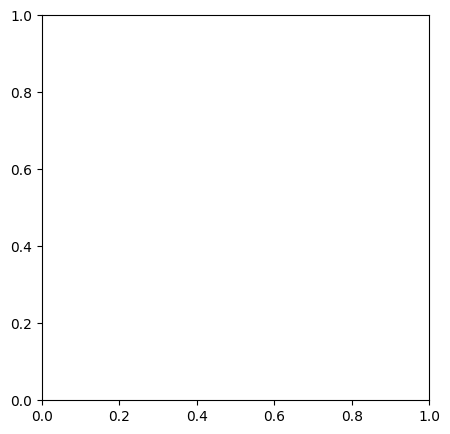

In [1]:
from lib.figure_6 import figure_6_poster_panel_f

figure_6_poster_panel_f(reset=False, mono=True)